<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/%D0%94%D0%97_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [153]:
import pandas as pd
import torch

Дані про банани

In [154]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/banana_quality.csv')

df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

columns = df.columns.delete(-1)
data = df[columns]
df[columns] = (data - data.min()) / (data.max() - data.min())

In [155]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,0.380309,0.626747,0.680712,0.360975,0.567312,0.671933,0.543416,1
1,0.349951,0.628093,0.485275,0.293682,0.481689,0.646850,0.545720,1
2,0.478460,0.699448,0.572694,0.283811,0.499358,0.716580,0.617337,1
3,0.446465,0.705394,0.595677,0.374028,0.473461,0.633590,0.556625,1
4,0.541672,0.687704,0.458841,0.378242,0.442847,0.579430,0.705908,1


Потрібно на основі інформації про банан спрогнозувати його якість `Quality`

# Завдання 1
Створіть клас Dataset для тренувальних та тестових даних

In [156]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self, X, y):
    super().__init__()
    self.X = torch.tensor(X.values, dtype=torch.float32)
    self.y = torch.tensor(y.values, dtype=torch.float32)
    self.y = self.y.reshape(-1, 1)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


In [157]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Quality')
y = df.Quality

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)


In [158]:
data_train = MyDataset(X_train, y_train)
data_test = MyDataset(X_test, y_test)
X_test

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
2215,0.426811,0.484122,0.360909,0.401851,0.536194,0.664820,0.409135
2582,0.363698,0.392039,0.360657,0.629282,0.544862,0.883346,0.210130
1662,0.499763,0.678276,0.800902,0.528220,0.365372,0.434814,0.688594
3027,0.484169,0.456168,0.328959,0.386184,0.510853,0.745869,0.428388
4343,0.516375,0.357309,0.290865,0.414493,0.732973,0.517452,0.344282
...,...,...,...,...,...,...,...
1079,0.431448,0.871775,0.356953,0.262278,0.591903,0.748206,0.620630
7979,0.426730,0.361851,0.254291,0.603280,0.446531,0.309404,0.520910
1115,0.318484,0.838689,0.567726,0.340466,0.470005,0.626725,0.463997
6093,0.451598,0.470328,0.341389,0.540312,0.665950,0.274119,0.659157


In [159]:
data_train[9], len(data_train)

((tensor([0.6612, 0.4500, 0.4019, 0.6540, 0.5286, 0.7520, 0.2494]),
  tensor([1.])),
 6400)

In [160]:
data_test[9], len(data_test)

((tensor([0.3167, 0.4859, 0.2733, 0.2790, 0.3040, 0.5551, 0.5294]),
  tensor([0.])),
 1600)

# Завдання 2
Створіть DataLoader

In [161]:
from torch.utils.data import DataLoader
# train_dl, val_dl
train_dl = DataLoader(data_train, batch_size=128, shuffle=True)
val_dl = DataLoader(data_test, batch_size=128, shuffle=True)


# Завдання 3
Створіть нейромережу

In [162]:
from torch import nn
n1, n2, n3, n4 = X.shape[1], 40, 20, 1

model = nn.Sequential(
    nn.Linear(n1, n2),
    nn.ReLU(),
    nn.Linear(n2, n3),
    nn.ReLU(),
    nn.Linear(n3, n4),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=7, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)

# Завдання 4
Визначте функцію втрат та оптимізатор

In [163]:

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [164]:
model.train()

Sequential(
  (0): Linear(in_features=7, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)

In [165]:
for batch in train_dl:
    x, y = batch
    print(x.shape)  # Має бути (batch_size, n_features)
    break

for batch in val_dl:
    x, y = batch
    print(x.shape)  # Має бути (batch_size, n_features)
    break

torch.Size([128, 7])
torch.Size([128, 7])


# Завдання 5
Натренуйте нейромережу. Візміть невелику кількість епох

In [166]:
# @title Функція для тренування
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()


            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
              try:
                  history_train[name] += func(y, y_pred) * x.size(0)
              except:
                  if task == 'binary': y_pred_ = y_pred.round()
                  elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                  history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [167]:
import matplotlib.pyplot as plt

def plot_metric(history, name):
  plt.title(f"Model results with {name}")
  plt.plot(history[name], label='train')
  plt.plot(history['val_'+name], label='val')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend()

# Завдання 6
Виведіть графіки метрик та марицю помилок

In [168]:
history = train(model, optimizer, loss_fn, train_dl, val_dl)

#plot_metric("history", "name")

train() called: model=Sequential, opt=Adam(lr=0.010000), epochs=20, device=cpu

Epoch    1    0sec	loss:      0.574	val_loss:      0.375	
Epoch    2    0sec	loss:      0.295	val_loss:      0.206	
Epoch    3    0sec	loss:      0.188	val_loss:      0.158	
Epoch    4    0sec	loss:      0.153	val_loss:      0.143	
Epoch    5    0sec	loss:      0.155	val_loss:      0.148	
Epoch    6    0sec	loss:      0.144	val_loss:      0.129	
Epoch    7    0sec	loss:      0.135	val_loss:      0.127	
Epoch    8    0sec	loss:      0.134	val_loss:      0.135	
Epoch    9    0sec	loss:      0.132	val_loss:      0.136	
Epoch   10    0sec	loss:      0.151	val_loss:      0.121	
Epoch   11    0sec	loss:      0.125	val_loss:      0.124	
Epoch   12    0sec	loss:      0.121	val_loss:      0.149	
Epoch   13    0sec	loss:      0.122	val_loss:      0.119	
Epoch   14    0sec	loss:      0.119	val_loss:       0.13	
Epoch   15    0sec	loss:      0.116	val_loss:       0.11	
Epoch   16    0sec	loss:      0.121	val_loss:     

In [174]:
history['val_loss']

[0.3749377858638763,
 0.2055878484249115,
 0.15834466159343719,
 0.14302846431732177,
 0.14794205069541932,
 0.12857531905174255,
 0.12719840198755264,
 0.13489972114562987,
 0.1362903106212616,
 0.12078132838010788,
 0.12442769825458527,
 0.14919553339481353,
 0.11904869586229325,
 0.12990305542945862,
 0.11049033641815185,
 0.1111161021888256,
 0.10975488305091857,
 0.11970093667507171,
 0.10803271740674973,
 0.1159555146098137]

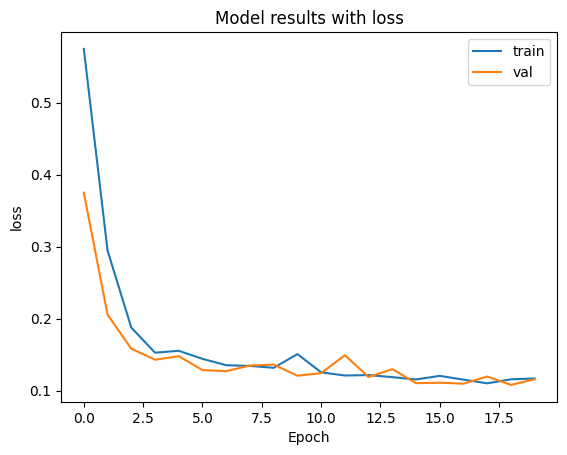

In [172]:
plot_metric(history, "loss")

In [195]:
y_pred = model(torch.Tensor(X_test.values))  #.detach().numpy()

y_pred = (y>0.5)
y_pred

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False

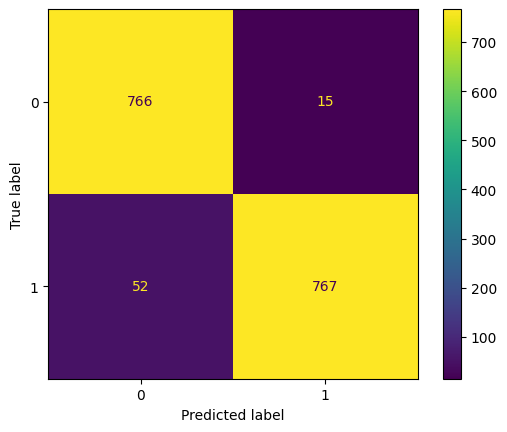

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model(torch.Tensor(X_test.values))

y_pred = (y_pred > 0.5)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)